<a href="https://colab.research.google.com/github/ishankhurana27/first-repo/blob/main/DS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
data = pd.read_csv('Dataset/Mobilephone_data_final.csv')

# Removing the 'Sr. No.' column from the DataFrame
data.drop(columns='Sr. No.', inplace=True)

In [ ]:
data.head()

,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,12000,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,6000,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,4000,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,4000,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,6000,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    1359 non-null   object 
 1   Brand                   1359 non-null   object 
 2   Model                   1359 non-null   object 
 3   Battery capacity (mAh)  1359 non-null   int64  
 4   Screen size (inches)    1359 non-null   float64
 5   Touchscreen             1359 non-null   object 
 6   Resolution x            1359 non-null   int64  
 7   Resolution y            1359 non-null   int64  
 8   Processor               1359 non-null   int64  
 9   RAM (MB)                1359 non-null   int64  
 10  Internal storage (GB)   1359 non-null   float64
 11  Rear camera             1359 non-null   float64
 12  Front camera            1359 non-null   float64
 13  Operating system        1359 non-null   object 
 14  Wi-Fi                   1359 non-null   

In [ ]:
data.describe()

,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,2938.489330,5.291310,811.543046,1490.777778,5.551141,2488.777778,30.654864,12.070199,7.037969,1.833701,11465.825607
std,873.514133,0.671357,270.707271,557.780120,2.196562,1664.440386,36.950241,8.948337,6.295448,0.374457,13857.497077
min,1010.000000,2.400000,240.000000,320.000000,1.000000,64.000000,0.064000,0.000000,0.000000,1.000000,494.000000
25%,2300.000000,5.000000,720.000000,1280.000000,4.000000,1000.000000,8.000000,8.000000,2.000000,2.000000,4763.500000
50%,3000.000000,5.200000,720.000000,1280.000000,4.000000,2000.000000,16.000000,12.200000,5.000000,2.000000,6999.000000
75%,3500.000000,5.700000,1080.000000,1920.000000,8.000000,3000.000000,32.000000,13.000000,8.000000,2.000000,11999.000000
max,6000.000000,7.300000,2160.000000,3840.000000,10.000000,12000.000000,512.000000,108.000000,48.000000,3.000000,174990.000000


## Dataset Overview

### Quantitative Variables
- **Battery Capacity (mAh)**: The capacity of the battery measured in milliampere-hours (mAh).
- **Screen Size (inches)**: The diagonal measurement of the screen in inches.
- **Resolution x**: The width resolution of the screen.
- **Resolution y**: The height resolution of the screen.
- **Processor**: The number of processor cores in the device.
- **RAM (MB)**: The amount of RAM available in the device, measured in megabytes (MB).
- **Internal Storage**: The total internal storage capacity of the device, measured in gigabytes (GB).
- **Rear Camera**: The resolution of the rear camera in megapixels (MP), or 0 if not present.
- **Front Camera**: The resolution of the front camera in megapixels (MP), or 0 if not present.
- **Price**: The cost of the phone in Indian Rupees (INR).

### Categorical  Variables
- **Name**: The name or designation of the phone.
- **Brand**: The manufacturer or brand of the phone.
- **Model**: The specific model of the phone.
- **Operating System**: The software platform used by the phone.
- **Touchscreen**: Indicates if the phone supports touchscreen functionality (Yes and No).
- **Wi-Fi**: Indicates if the phone has Wi-Fi capability (Yes and No).
- **Bluetooth**: Indicates if the phone has Bluetooth capability (Yes and No).
- **GPS**: Indicates if the phone has GPS functionality (Yes and No).
- **Number of SIMs**: Indicates the number of SIM.
- **3G**: Indicates if the phone supports 3G network connectivity (Yes and No).
- **4G/LTE**: Indicates if the phone supports 4G or LTE network connectivity (Yes and No).


In [ ]:
# Print the shape of the DataFrame (number of rows and columns)
print("Printing The Shape of Data: " + str(data.shape))

Printing The Shape of Data: (1359, 21)


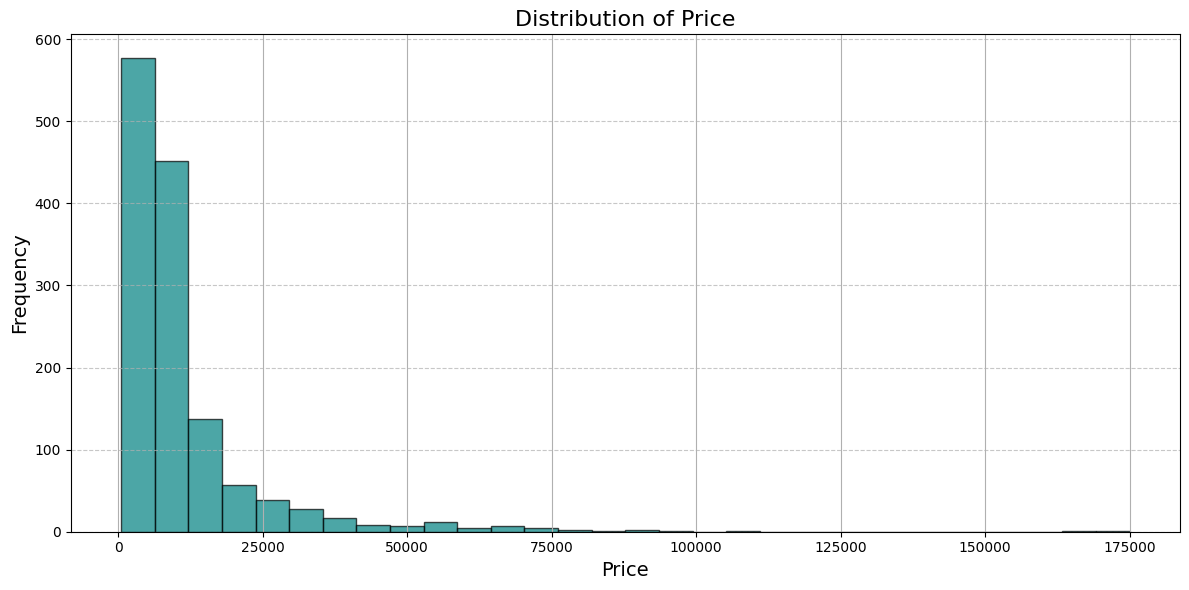

In [ ]:
# Create a histogram of the 'Price' column with custom styles
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the histogram
data['Price'].hist(
    bins=30,                    # Number of bins
    color='teal',               # Bar color
    edgecolor='black',          # Border color of the bars
    alpha=0.7                   # Transparency of the bars
)

# Customize the plot with titles and labels
plt.title('Distribution of Price', fontsize=16)  # Title of the plot
plt.xlabel('Price', fontsize=14)                 # X-axis label
plt.ylabel('Frequency', fontsize=14)             # Y-axis label

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit all elements nicely
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Define a list of selected columns to analyze
selected_columns = ['Name', 'Brand', 'Model', 'Operating system']

# Print the number of unique values in each of the selected columns
print(data[selected_columns].nunique())

Name                1359
Brand                 76
Model               1321
Operating system       7
dtype: int64


In [ ]:
# Print the count of each unique value in the 'Operating system' column
print(data['Operating system'].value_counts())
print('-----------------------------------')

# Print the count of each unique value in the 'Wi-Fi' column
print(data['Wi-Fi'].value_counts())
print('-----------------------------------')

# Print the count of each unique value in the 'Front camera' column
print(data['Front camera'].value_counts())

Operating system
Android       1299
Windows         19
iOS             17
Cyanogen        10
BlackBerry      10
Tizen            3
Sailfish         1
Name: count, dtype: int64
-----------------------------------
Wi-Fi
Yes    1351
No        8
Name: count, dtype: int64
-----------------------------------
Front camera
5.0     464
8.0     270
2.0     205
16.0     97
0.3      86
13.0     55
20.0     25
32.0     23
0.0      18
1.3      17
24.0     16
25.0     13
3.2      10
12.0      8
7.0       8
4.0       7
1.2       6
10.0      6
1.9       4
1.6       3
2.1       3
2.2       3
2.4       3
3.7       2
1.1       2
48.0      1
3.0       1
0.9       1
1.5       1
40.0      1
Name: count, dtype: int64


In [ ]:
# Define the columns of interest for finding minimum and maximum values
selected_columns = ['Operating system', 'Wi-Fi', 'Front camera', 'Price']

# Calculate and print the minimum values for each column in the selected columns
min_values = data[selected_columns].min()
print("Min values:")
print(min_values)

print('----------------')

# Calculate and print the maximum values for each column in the selected columns
max_values = data[selected_columns].max()
print("Max values:")
print(max_values)

Min values:
Operating system    Android
Wi-Fi                    No
Front camera            0.0
Price                   494
dtype: object
----------------
Max values:
Operating system       iOS
Wi-Fi                  Yes
Front camera          48.0
Price               174990
dtype: object


In [ ]:
# Sort the DataFrame by the 'Front camera' column
print('Sorting the Column by Front camera')
sorted_data = data.sort_values(by='Front camera')

print(sorted_data)

Sorting the Column by Front camera
                          Name     Brand             Model  \
1358       iBall Andi Avonte 5     iBall     Andi Avonte 5   
428               Oppo N1 Mini      Oppo           N1 Mini   
431            Motorola Moto E  Motorola            Moto E   
436           Nokia X Dual SIM     Nokia        X Dual SIM   
443             Nokia Asha 502     Nokia          Asha 502   
...                        ...       ...               ...   
275                  Honor 20i     Honor               20i   
16              Huawei P30 Pro    Huawei           P30 Pro   
4                 LG G8X ThinQ        LG         G8X ThinQ   
614   Samsung Galaxy S20 Ultra   Samsung  Galaxy S20 Ultra   
89                     Asus 6Z      Asus                6Z   

      Battery capacity (mAh)  Screen size (inches) Touchscreen  Resolution x  \
1358                    2150                  5.00         Yes           480   
428                     2140                  5.00         Y

In [ ]:
# Calculate the mean price for each 'Operating system'
mean_prices = data.groupby('Operating system')['Price'].mean()

print(mean_prices)

Operating system
Android       10989.947652
BlackBerry    10509.600000
Cyanogen       9173.600000
Sailfish       4799.000000
Tizen          4459.666667
Windows       16706.684211
iOS           45510.470588
Name: Price, dtype: float64


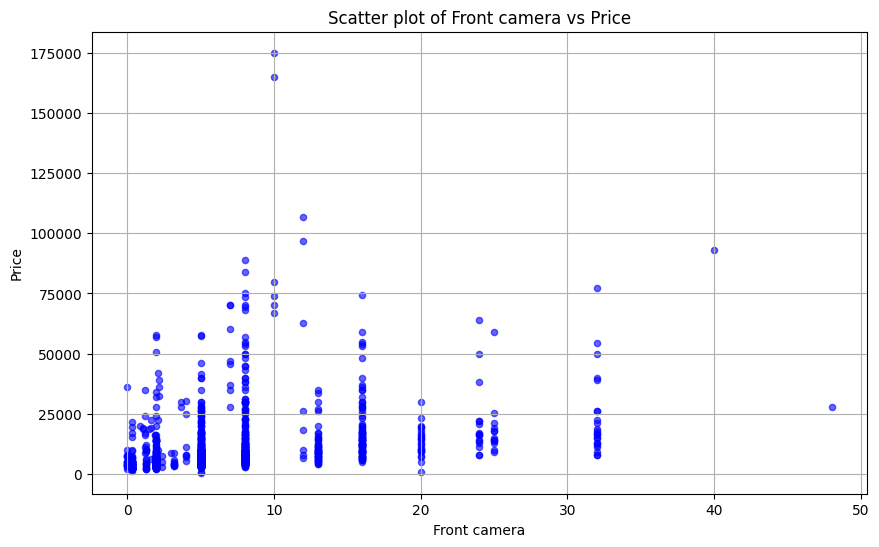

In [ ]:

plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(
    data['Front camera'],
    data['Price'],
    c='blue',                  # Color of the points
    s=20,                      # Size of the points
    alpha=0.6,                 # Transparency of the points
)

# Set labels and title
plt.xlabel('Front camera')
plt.ylabel('Price')
plt.title('Scatter plot of Front camera vs Price')

# Add grid lines for better readability
plt.grid(True)

plt.show()

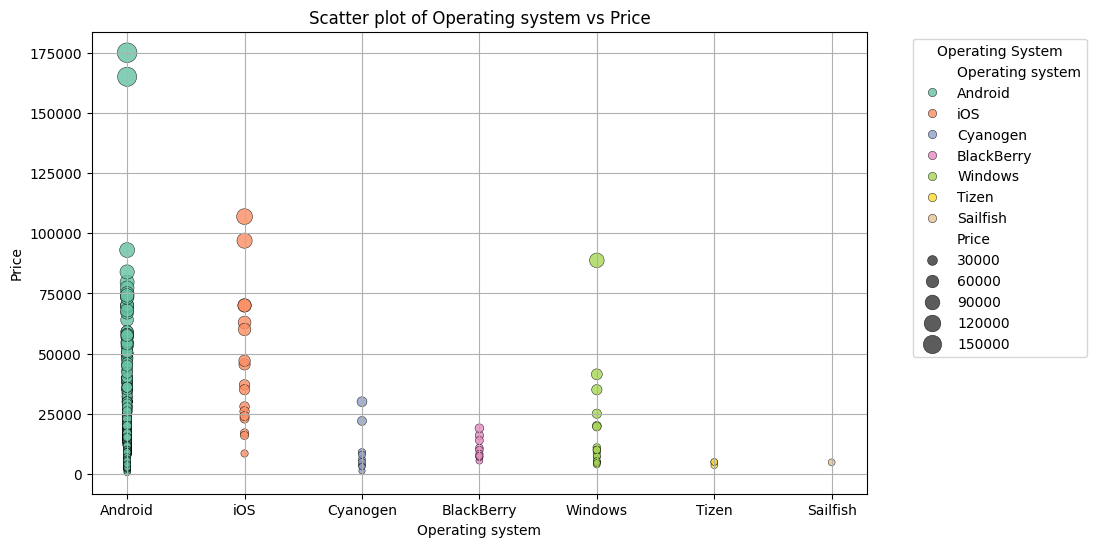

In [ ]:
plt.figure(figsize=(10, 6))

# Use seaborn to handle categorical coloring
sns.scatterplot(
    x='Operating system',
    y='Price',
    data=data,
    hue='Operating system',        # Color by 'Operating system'
    palette='Set2',                # Set2 is a color palette, you can choose others like 'viridis', 'pastel'
    size='Price',                  # Use price to determine size of points
    sizes=(20, 200),              # Range of sizes for the points
    alpha=0.8,                    # Transparency of the points
    edgecolor='k'                 # Color of point borders
)

plt.xlabel('Operating system')
plt.ylabel('Price')
plt.title('Scatter plot of Operating system vs Price')

plt.grid(True)

plt.legend(title='Operating System', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside
plt.show()


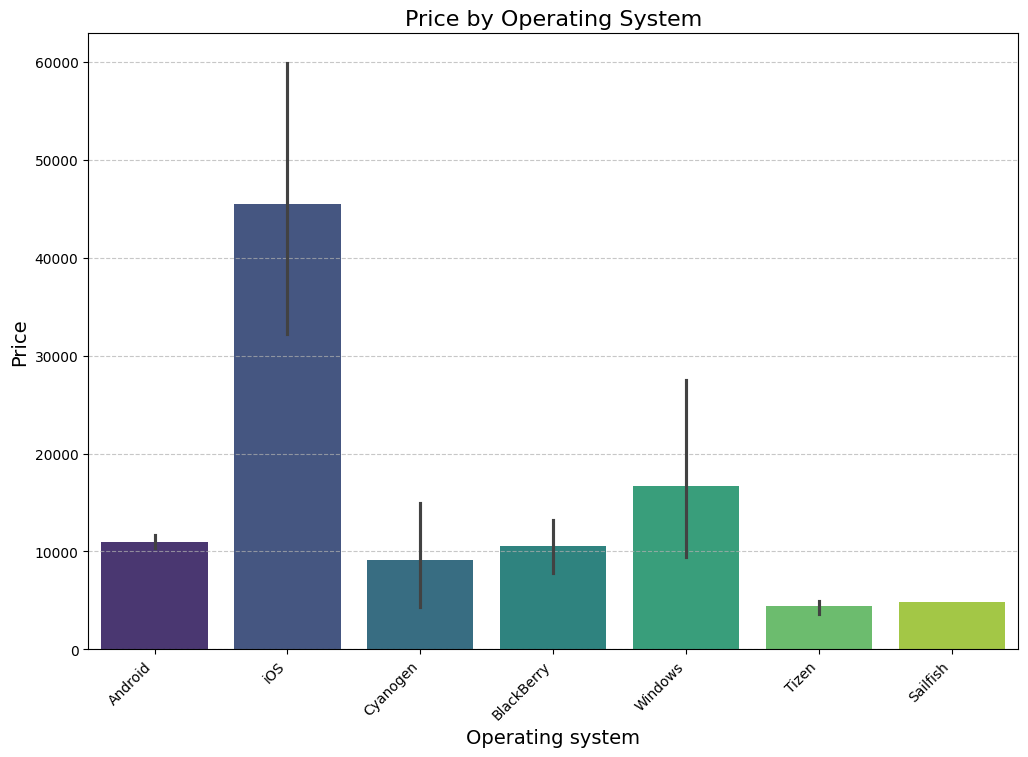

In [ ]:

plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(
    x='Operating system',
    y='Price',
    data=data,
    hue='Operating system',
    palette='viridis',          # Choose a color palette for the bars
)

# Customize the labels and title
plt.xlabel('Operating system', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price by Operating System', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

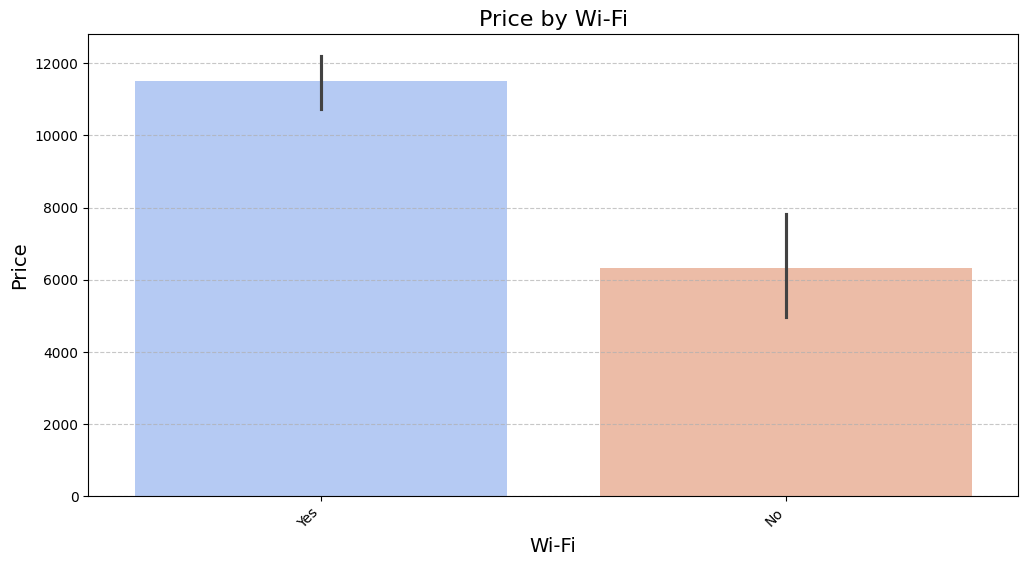

In [ ]:
plt.figure(figsize=(12, 6))
# Create a bar plot
sns.barplot(
    x='Wi-Fi',
    y='Price',
    data=data,
    palette='coolwarm',      # Choose a color palette for the bars
    hue='Wi-Fi',
    estimator='mean'        # Compute the mean of 'Price' for each 'Wi-Fi' category
)

# Customize the labels and title
plt.xlabel('Wi-Fi', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price by Wi-Fi', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

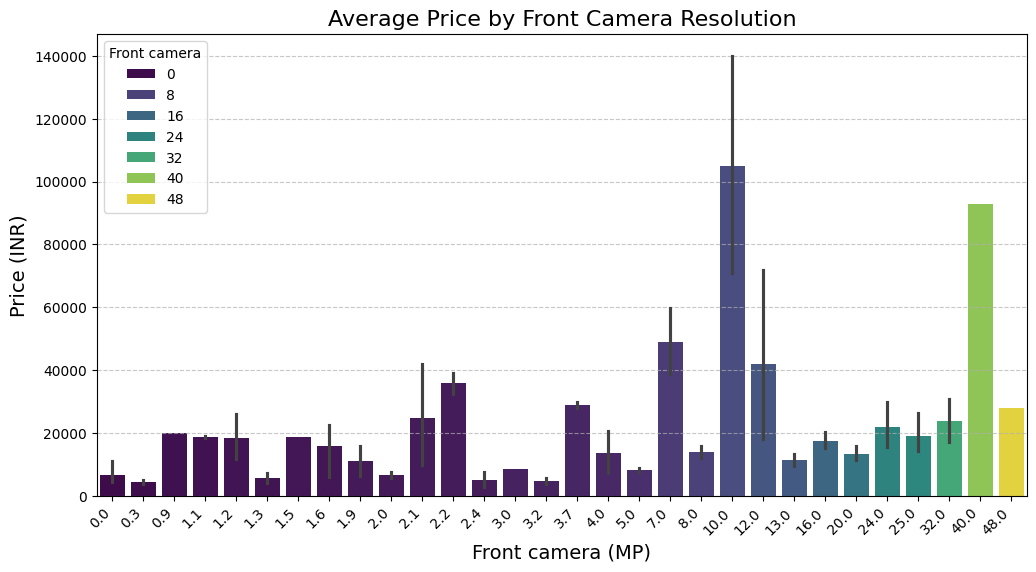

In [ ]:
plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(
    x='Front camera',
    y='Price',
    data=data,
    palette='viridis',         # Choose a color palette for the bars
    hue='Front camera',                   # Disable confidence intervals
    estimator='mean',         # Compute the mean of 'Price' for each 'Front camera' value
)

# Customize the labels and title
plt.xlabel('Front camera (MP)', fontsize=14)
plt.ylabel('Price (INR)', fontsize=14)
plt.title('Average Price by Front Camera Resolution', fontsize=16)

# Rotate x-axis labels if they are long or if there are many unique values
plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


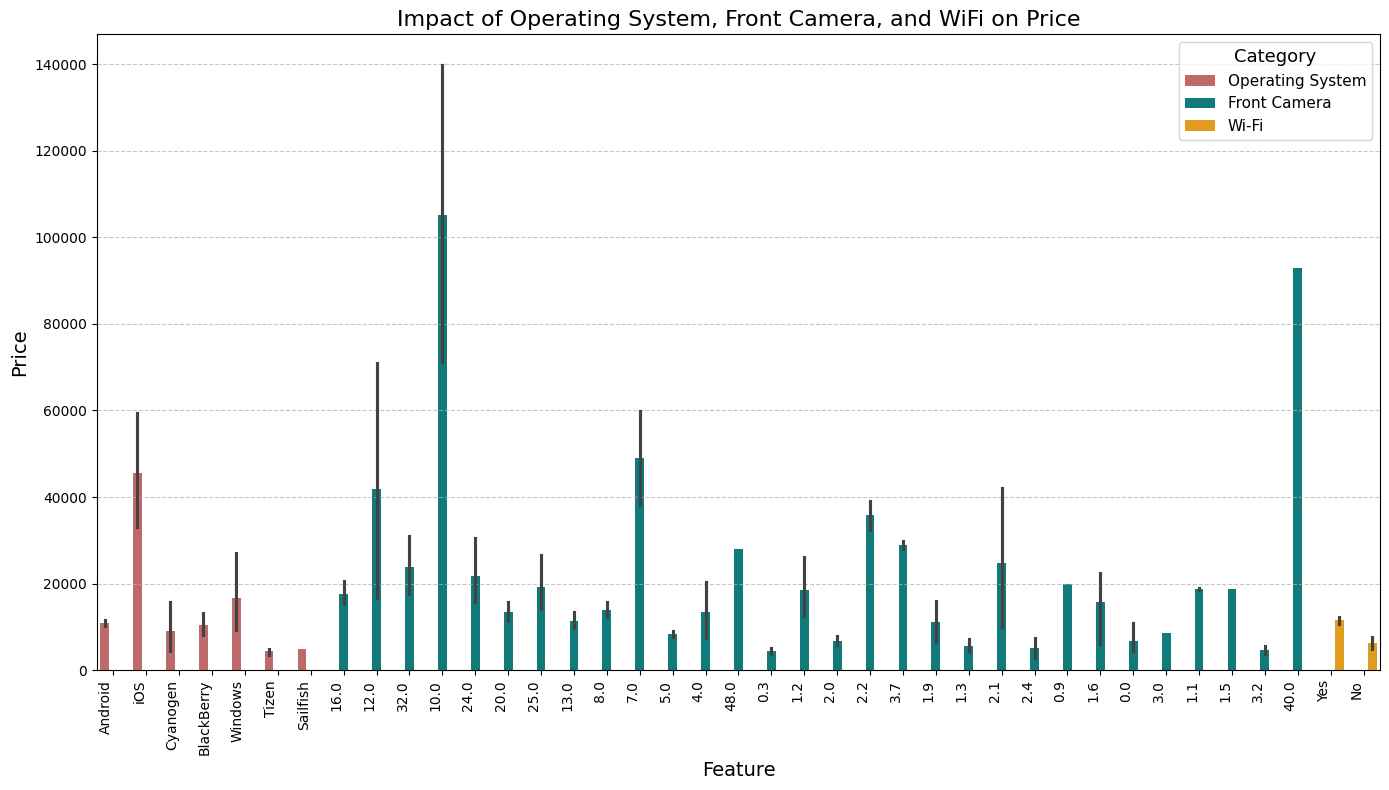

In [ ]:
# Prepare data
op_system = data['Operating system']
price = data['Price']
front_camera = data['Front camera']
wifi = data['Wi-Fi']

# Create a DataFrame for plotting
data = {
    'Feature': np.concatenate([op_system, front_camera, wifi]),
    'Price': np.concatenate([price, price, price]),
    'Category': ['Operating System'] * len(op_system) + \
                ['Front Camera'] * len(front_camera) + \
                ['Wi-Fi'] * len(wifi)
}

# Convert to DataFrame
df_plot = pd.DataFrame(data)

# Set up the figure
plt.figure(figsize=(14, 8))

# Create bar plots for each category
sns.barplot(
    x='Feature',
    y='Price',
    hue='Category',
    data=df_plot,
    palette={'Operating System': 'indianred',
             'Front Camera': 'darkcyan',
             'Wi-Fi': 'orange'},
    dodge=True
)

# Customize the labels and title
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Impact of Operating System, Front Camera, and WiFi on Price', fontsize=16)

# Rotate x-axis labels if they are long or if there are many unique values
plt.xticks(rotation=90, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(title='Category', title_fontsize='13', fontsize='11')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


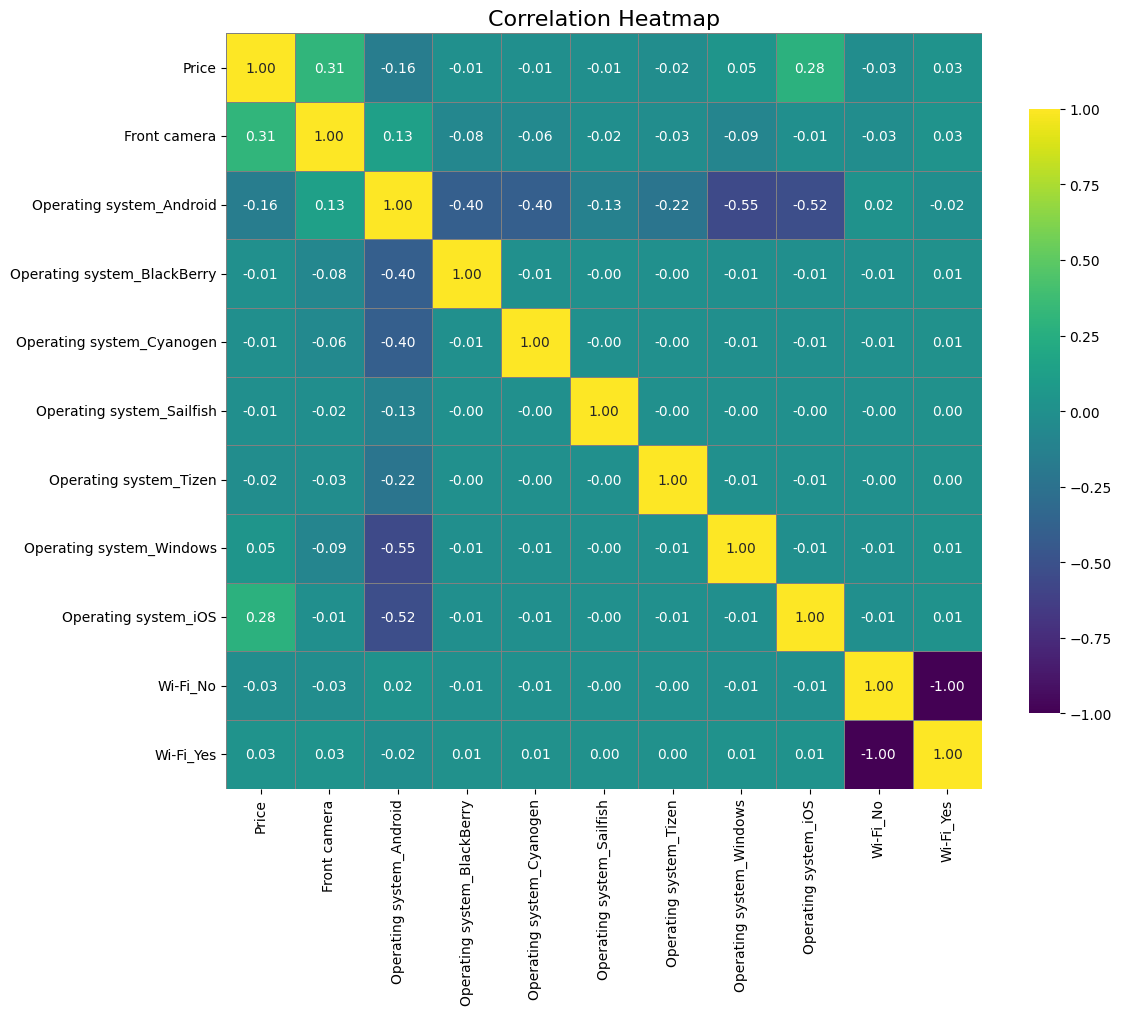

In [ ]:
# Load the CSV file into a DataFrame
data = pd.read_csv('Dataset/Mobilephone_data_final.csv')

# Selecting the desired columns
selected_columns = ['Operating system', 'Price', 'Front camera', 'Wi-Fi']
selected_df = data[selected_columns]

# Encode categorical variables (one-hot encoding)
selected_df_encoded = pd.get_dummies(selected_df)

# Set up the figure
plt.figure(figsize=(12, 10))

# Create the heatmap with enhanced styling
sns.heatmap(
    data=selected_df_encoded.corr(),
    annot=True,                # Show correlation coefficients
    cmap='viridis',            # Color palette
    fmt=".2f",                 # Format for annotation
    vmin=-1, vmax=1,           # Color scale range
    linewidths=0.5,            # Width of lines that divide cells
    linecolor='gray',          # Color of the lines that divide cells
    square=True,               # Make the heatmap square
    cbar_kws={"shrink": .8}    # Color bar size adjustment
)

# Customize the title and layout
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()

plt.show()


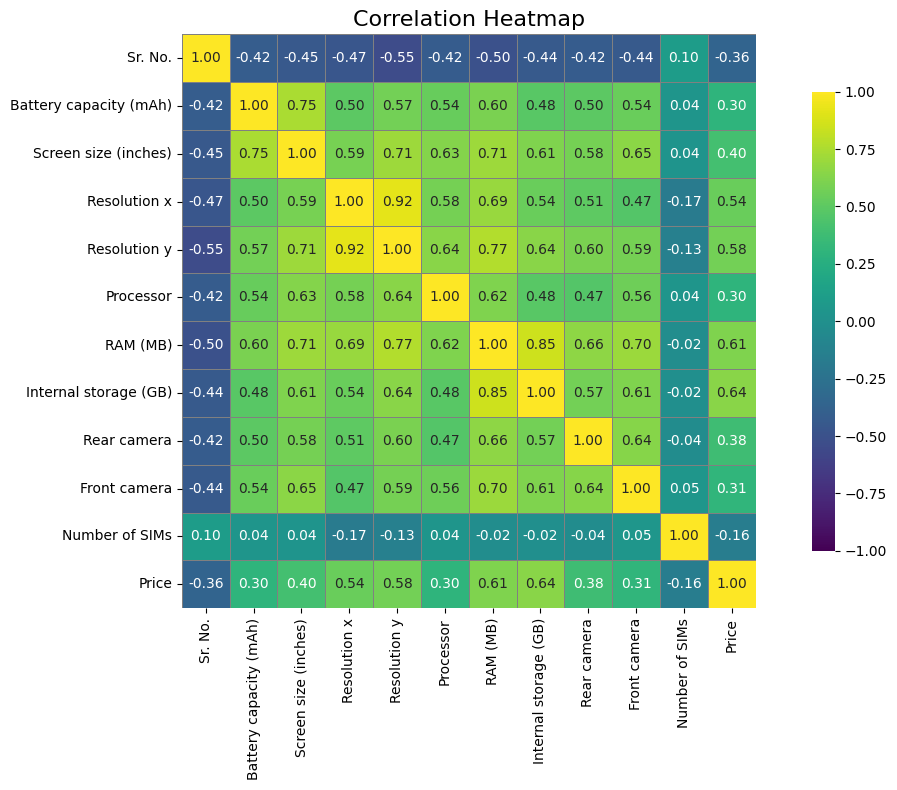

In [ ]:
# Select only numeric columns for correlation
numeric_columns = data.select_dtypes(include=['int', 'float']).columns
selected_df = data[numeric_columns]

# Set up the figure
plt.figure(figsize=(12, 8))

# Create the heatmap with enhanced styling
sns.heatmap(
    data=selected_df.corr(),
    annot=True,                # Show correlation coefficients
    cmap='viridis',            # Color palette
    fmt=".2f",                 # Format for annotation
    vmin=-1, vmax=1,           # Color scale range
    linewidths=0.5,            # Width of lines that divide cells
    linecolor='gray',          # Color of the lines that divide cells
    square=True,               # Make the heatmap square
    cbar_kws={"shrink": .8}    # Color bar size adjustment
)

plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()

plt.show()


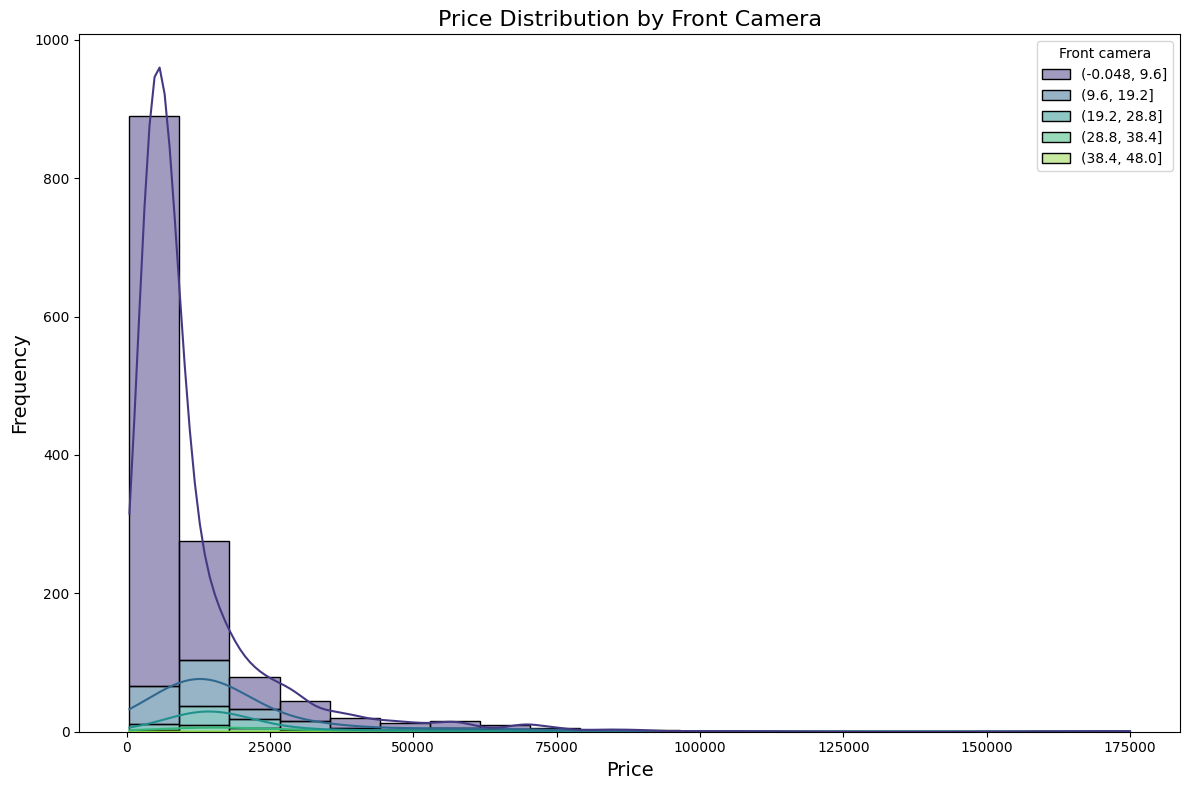

In [ ]:
# Bin the 'Front camera' column into 5 bins
front_camera_bins = pd.cut(data['Front camera'], bins=5)

# Set up the figure
plt.figure(figsize=(12, 8))

# Create the histogram with KDE and stacked bars
sns.histplot(
    data=data,
    x='Price',
    hue=front_camera_bins,
    multiple='stack',         # Stack the bars for different bins
    bins=20,                  # Number of bins for the histogram
    kde=True,                 # Add KDE to the histogram
    palette='viridis'         # Color palette for the bins
)

# Customize the plot with titles and labels
plt.title('Price Distribution by Front Camera', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adjust layout to prevent clipping
plt.tight_layout()

plt.show()

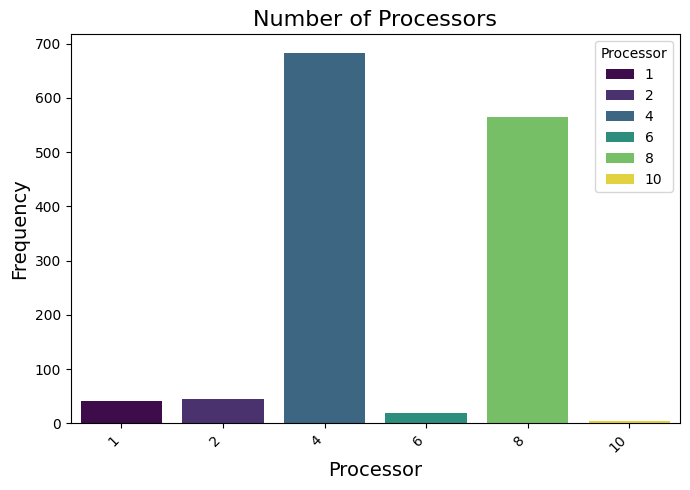

In [ ]:
processor = pd.DataFrame(data['Processor'])

# Set up the figure
plt.figure(figsize=(7, 5))

# Create the count plot
sns.countplot(
    x='Processor',
    data=processor,
    palette='viridis',         # Choose a color palette for better visualization
    hue='Processor'
)

# Customize the plot with titles and labels
plt.title('Number of Processors', fontsize=16)
plt.xlabel('Processor', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotate x-axis labels if they are long
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()


<Figure size 1500x800 with 0 Axes>

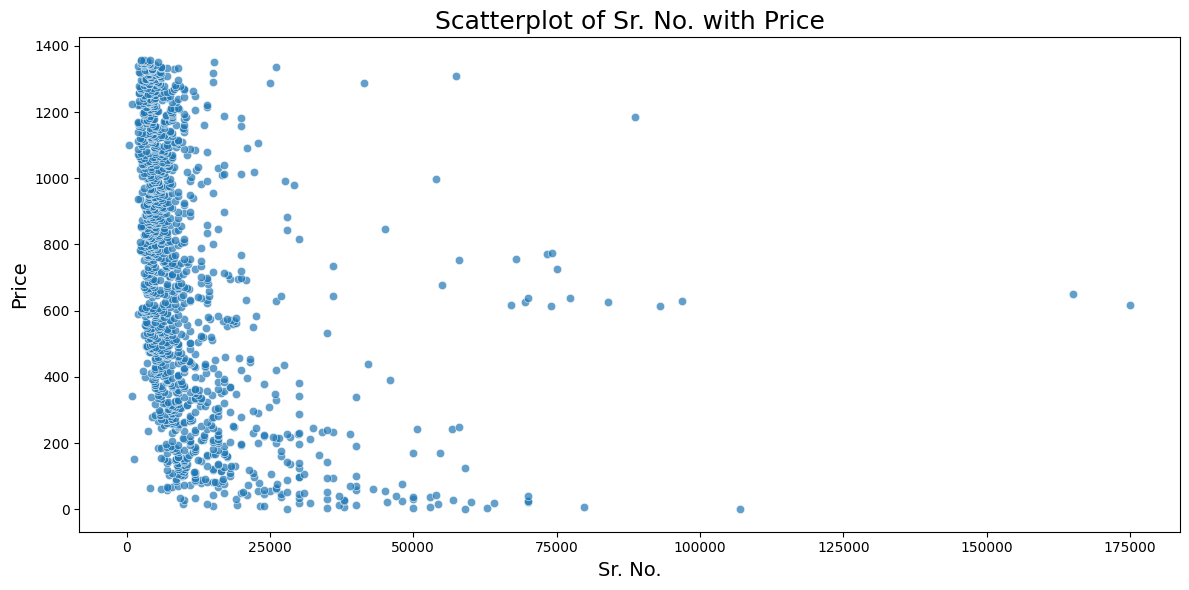

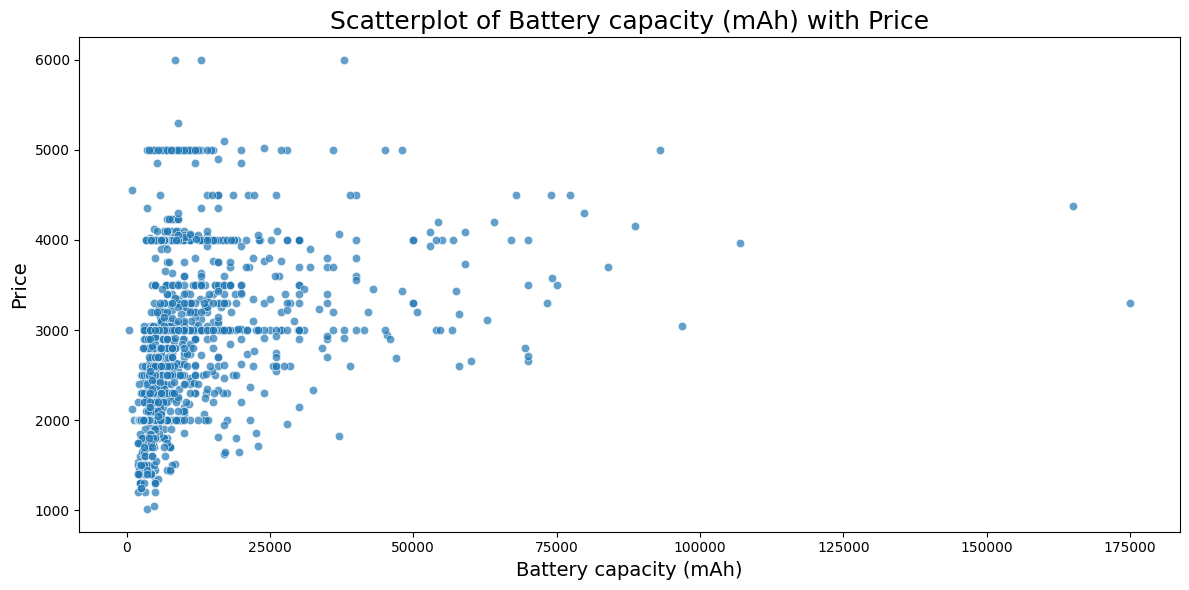

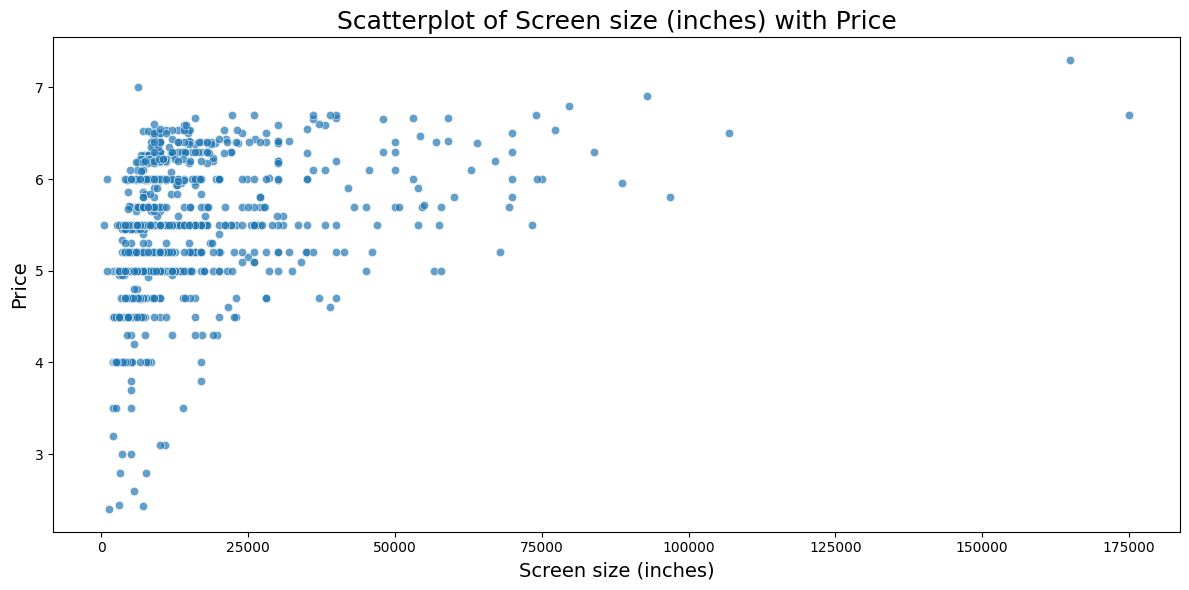

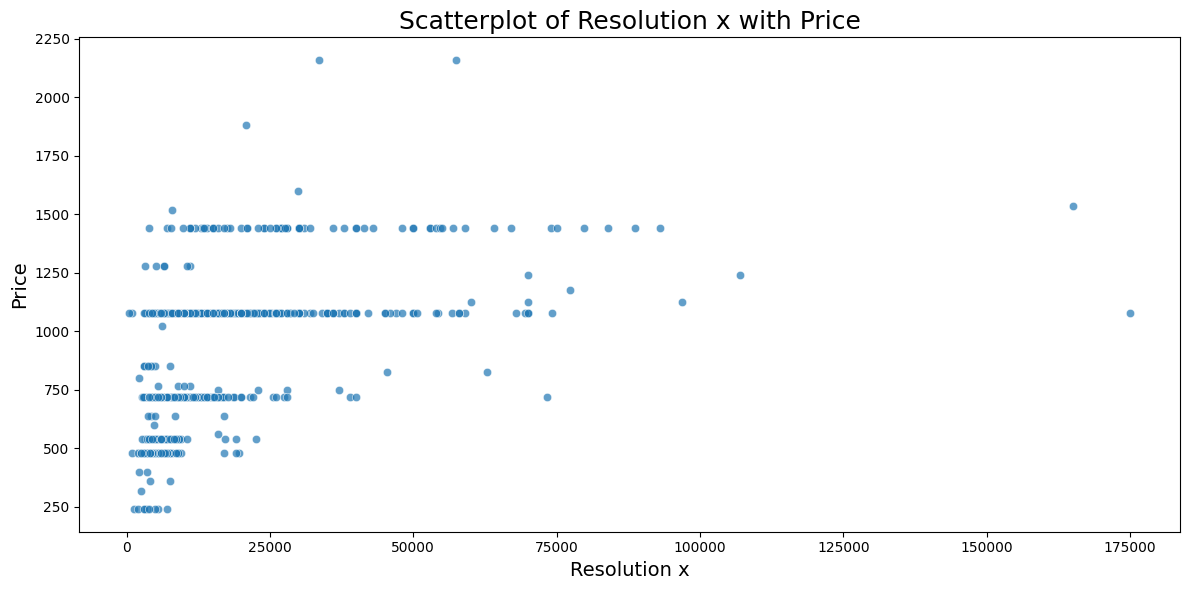

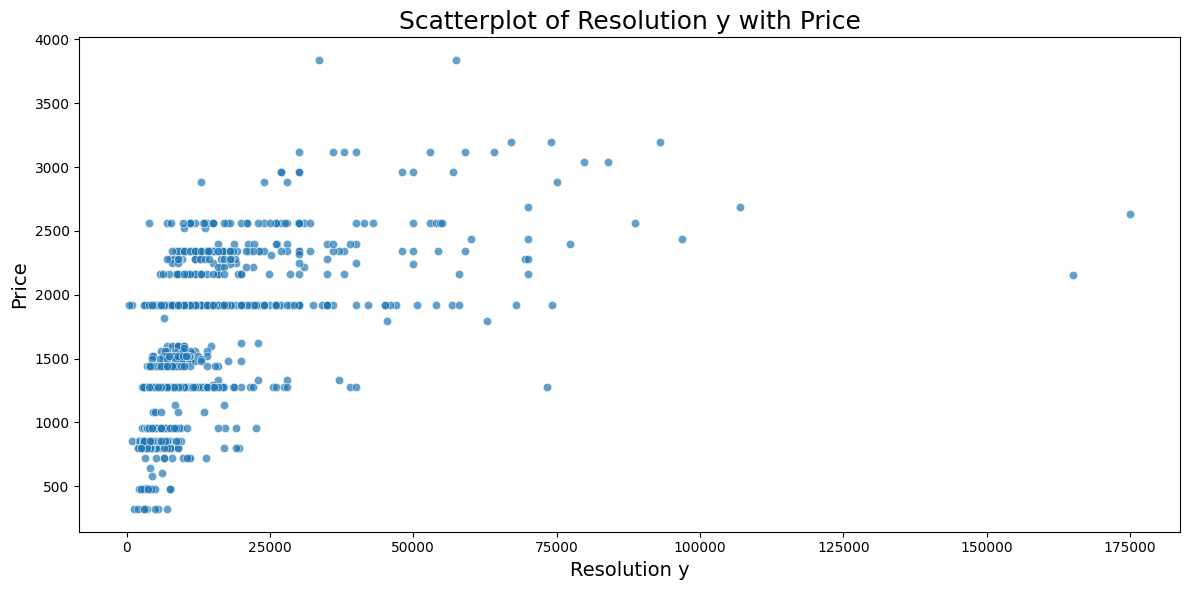

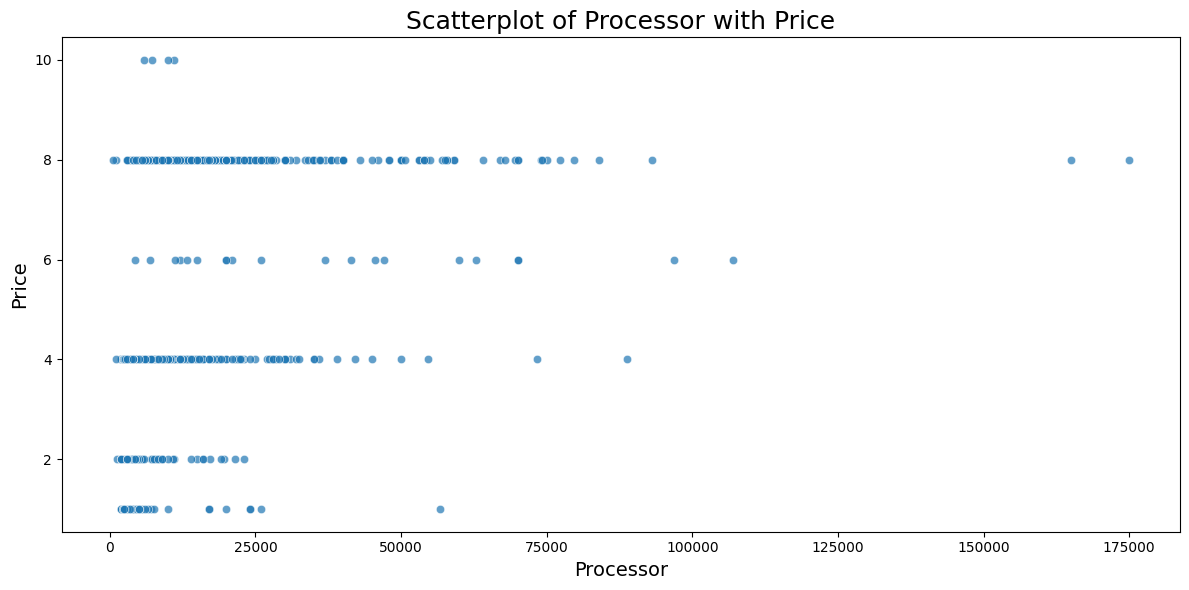

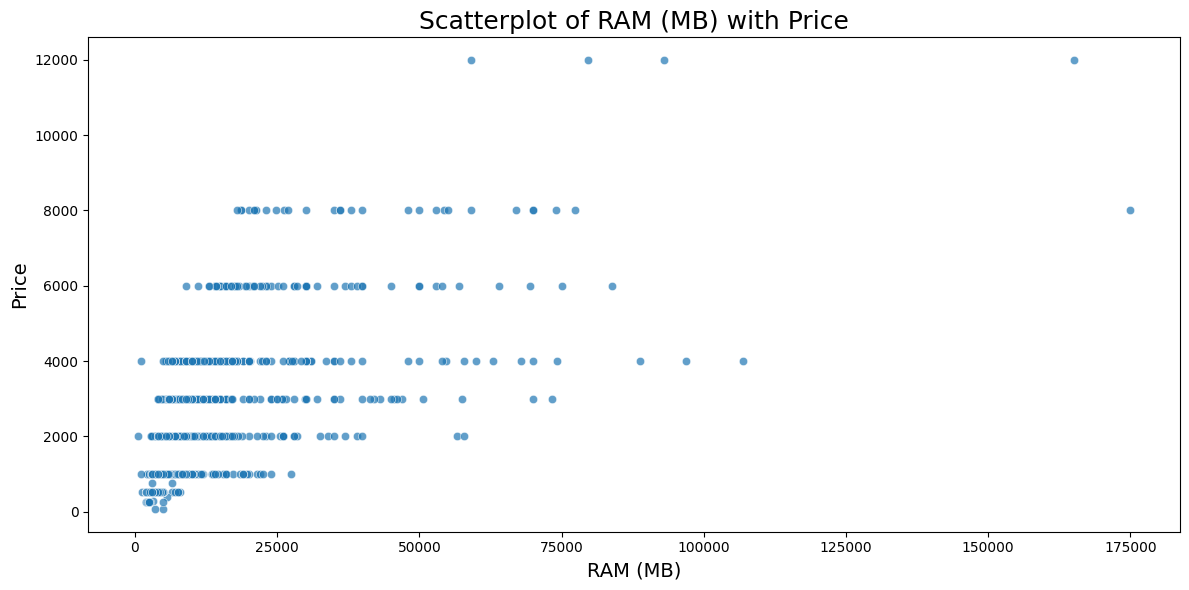

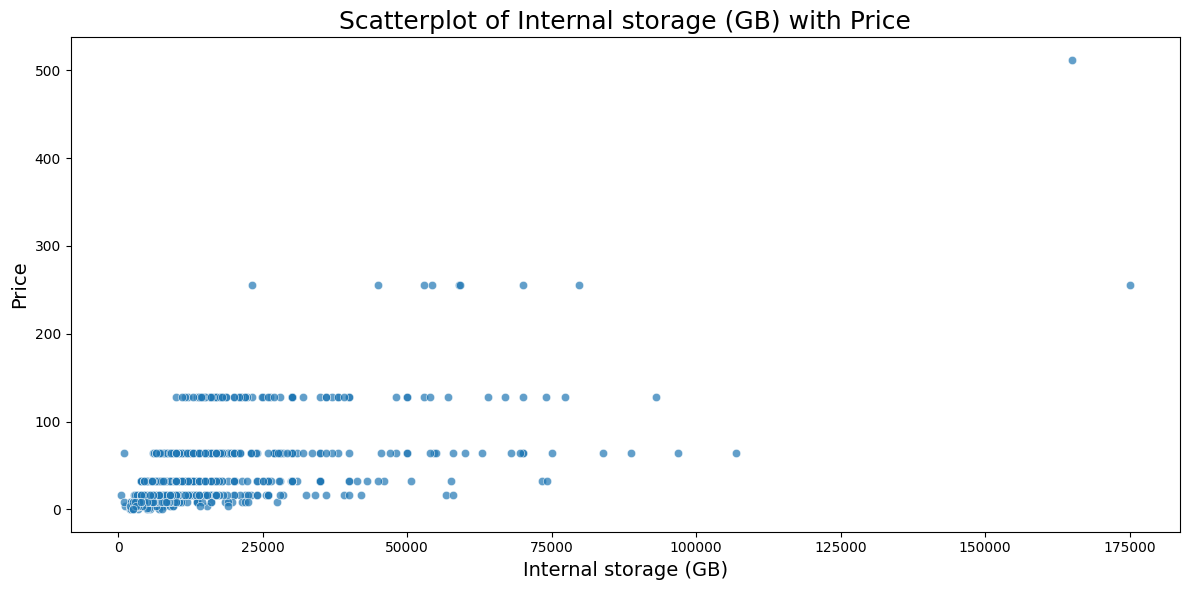

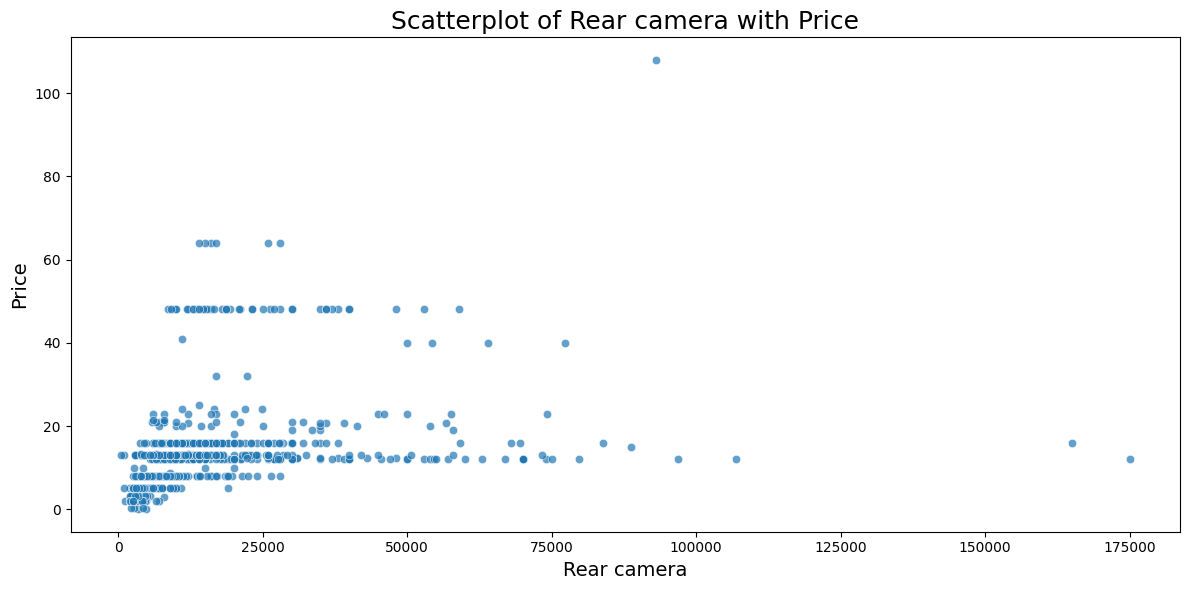

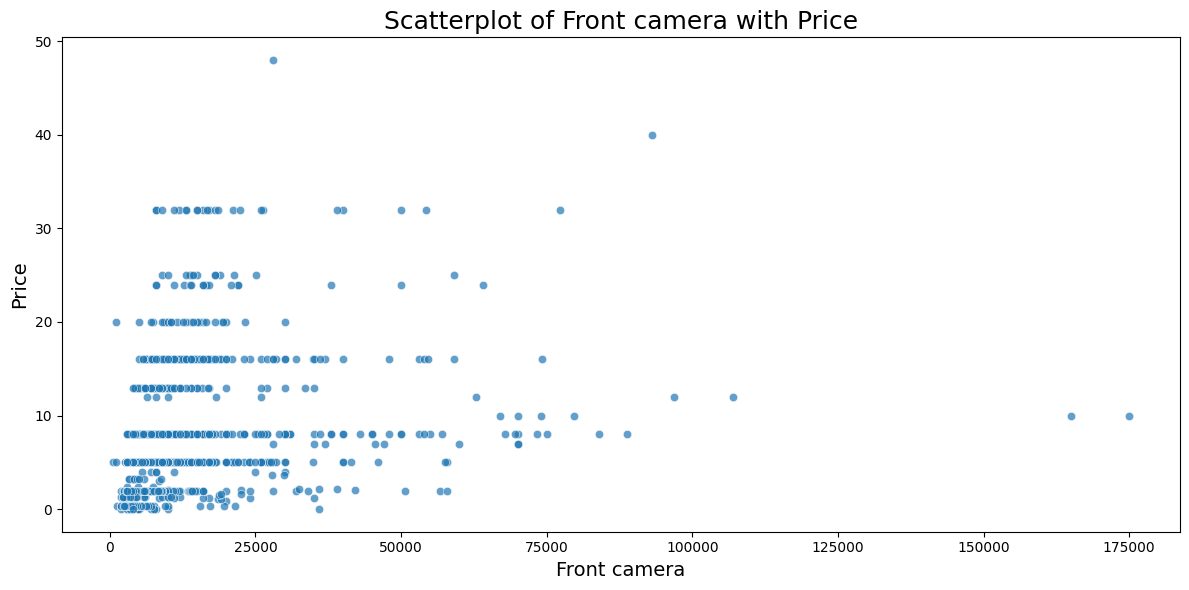

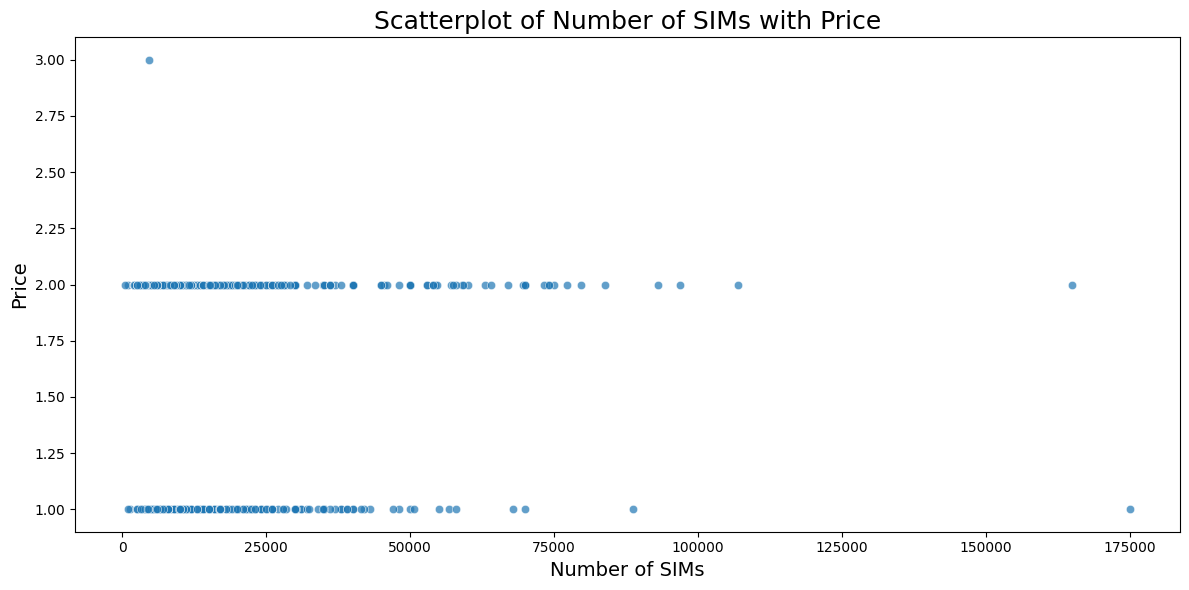

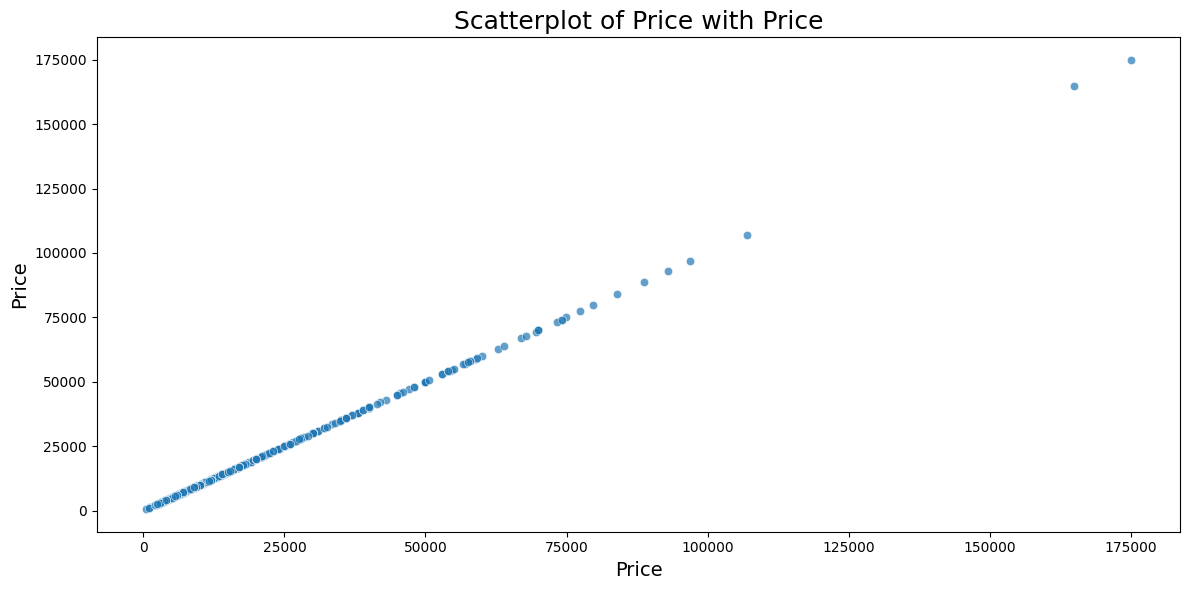

In [ ]:
plt.figure(figsize=(15, 8))

# List of numeric variables to plot
numeric_columns = data.select_dtypes(include=['int', 'float']).columns
numeric_data = data[numeric_columns]

# Iterate through each variable in the list
for var in numeric_data:
    # Create a new figure for each scatterplot
    plt.figure(figsize=(12, 6))

    # Create scatterplot for the current variable against price
    sns.scatterplot(x='Price', y=var, data=numeric_data, alpha=0.7)

    # Customize the plot with titles and labels
    plt.title(f'Scatterplot of {var} with Price', fontsize=18)
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Price', fontsize=14)

    # Display the plot
    plt.tight_layout()
    plt.show()


## Conclusions from Exploratory Data Analysis

### 1. Battery Capacity and Pricing
- Phones with larger battery capacities tend to be priced higher. This is because extended battery life, which reduces the need for frequent recharging, adds value and justifies a higher price point.

### 2. Screen Size and Pricing
- There isn’t a straightforward link between screen size and price. While mid-range phones might feature larger screens for a better viewing experience, high-end phones often emphasize a more compact design, which doesn’t necessarily correlate with larger screen sizes.

### 3. Camera Quality and Pricing
- Devices with advanced camera resolutions usually come with a higher price tag. This trend caters to users who prioritize superior photography and videography capabilities.

### 4. Operating System Trends
- Android leads as the predominant operating system, reflecting a vast and varied market with numerous brands and versions within the Android ecosystem.

In [ ]:
print("Missing Values:", data.isnull().sum())  # Display missing values count per column

Missing Values: Sr. No.                   0
Name                      0
Brand                     0
Model                     0
Battery capacity (mAh)    0
Screen size (inches)      0
Touchscreen               0
Resolution x              0
Resolution y              0
Processor                 0
RAM (MB)                  0
Internal storage (GB)     0
Rear camera               0
Front camera              0
Operating system          0
Wi-Fi                     0
Bluetooth                 0
GPS                       0
Number of SIMs            0
3G                        0
4G/ LTE                   0
Price                     0
dtype: int64


In [ ]:
x = data
y=data['Price']
x.drop(columns=['Sr. No.','Price','Name'], inplace=True)

## Data Encoding

In [ ]:
le = LabelEncoder()  # Initialize the LabelEncoder

# Loop through specified columns to encode categorical features
for column in ['Brand', 'Model', 'Operating system']:
    le = LabelEncoder()
    x[column] = le.fit_transform(x[column])  # Encode categorical column and replace in DataFrame

In [ ]:
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [4, 13, 14, 15, 17, 18])],  # Apply OneHotEncoder to specified columns
    remainder='passthrough'
)

x = np.array(ct.fit_transform(x))  # Apply transformations and convert the result to a NumPy array

## Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    x,  # Feature matrix
    y,  # Target vector
    test_size=0.2,  # Proportion of the data to include in the test split (20%)
    random_state=441  # Seed for random number generation to ensure reproducibility
)

In [ ]:
sc = StandardScaler()  # Initialize the StandardScaler

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Traning the model

In [ ]:
reg = LinearRegression()  # Initialize the LinearRegression model

reg.fit(X_train, y_train)  # Fit the model to the training data

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)  # Predict the target values for the test set

## Model Evaluation

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
MAE = mean_absolute_error(y_test, y_pred)
R_squared = r2_score(y_test, y_pred)

In [ ]:
print(f"Root Mean Squared Error (RMSE): {RMSE:.4f}")
print(f"Mean Absolute Error (MAE): {MAE:.4f}")
print(f"R-squared (R²): {R_squared:.4f}")

Root Mean Squared Error (RMSE): 7653.8744
Mean Absolute Error (MAE): 4855.3223
R-squared (R²): 0.7181
